Lab 02: Audio Files

Import the required libraries

In [43]:
from pydub import AudioSegment
from pydub.generators import Sine, Square, WhiteNoise
from pydub.playback import play
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

Create various types of sounds

In [44]:
sine_wave = Sine(440).to_audio_segment(duration=2000)  # 440Hz, 2s
square_wave = Square(330).to_audio_segment(duration=2000)  # 330Hz, 2s
noise = WhiteNoise().to_audio_segment(duration=2000)  # White noise, 2s
print("Playing Sine Wave...")
play(sine_wave)
print("Playing Square Wave...")
play(square_wave)
print("Playing Noise...")
play(noise)

Playing Sine Wave...


Input #0, wav, from '/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/tmp__s116ia.wav':
  Duration: 00:00:02.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s



Playing Square Wave...


Input #0, wav, from '/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/tmp79rc10fe.wav':
  Duration: 00:00:02.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s



Playing Noise...


Input #0, wav, from '/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/tmp7qdsd7j_.wav':
  Duration: 00:00:02.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s


Export to files

In [45]:
sine_wave.export("sine_wave.wav", format="wav")
square_wave.export("square_wave.wav", format="wav")
noise.export("noise.wav", format="wav")
print("Exported sine_wave.wav, square_wave.wav, noise.wav")

Exported sine_wave.wav, square_wave.wav, noise.wav


Combine the sounds

In [46]:
# Combine the sounds
combined = sine_wave + square_wave + noise 
# Play it
print("Playing Combined...")
play(combined)

Playing Combined...


Input #0, wav, from '/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/tmpsg32qlc0.wav':
  Duration: 00:00:06.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s


Export the file

In [47]:
print("Combined:", combined.duration_seconds, "seconds,", combined.frame_rate, "Hz,", combined.channels, "channel(s)")
combined.export("combined.wav", format="wav")

Combined: 6.0 seconds, 44100 Hz, 1 channel(s)


<_io.BufferedRandom name='combined.wav'>

Increase the sound amplitude

In [48]:
# Increase the combined to 20 dB
louder_combined1 = combined + 20
print("Playing Louder Combined 1...")
play(louder_combined1)
# Increase each component to 20 dB
louder_combined2 = (sine_wave + 20) + (square_wave + 20) + (noise + 20) 
print("Playing Louder Combined 2...")
play(louder_combined2)

Playing Louder Combined 1...


Input #0, wav, from '/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/tmpmlu3u2sq.wav':
  Duration: 00:00:06.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s



Playing Louder Combined 2...


Input #0, wav, from '/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/tmpgwqhrcic.wav':
  Duration: 00:00:06.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s


This does not increase the sound amplitude, but loops the audio

In [49]:
loop_combined = (sine_wave * 2) + (square_wave * 2) + (noise * 2) 
print("Playing Loop Combined...")
play(loop_combined)

Playing Loop Combined...


Input #0, wav, from '/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/tmpftdzrwdr.wav':
  Duration: 00:00:12.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s


Export these files

In [50]:
louder_combined1.export("louder_combined1.wav", format="wav")
louder_combined2.export("louder_combined2.wav", format="wav")
loop_combined.export("loop_combined.wav", format="wav")

<_io.BufferedRandom name='loop_combined.wav'>

The cutoff frequency is 1000, which means: Applying Low-Pass Filter: Keeps frequencies below 1000 Hz; Reduces/removes frequencies above 1000 Hz. The sound feels dull and smaller; Applying High-Pass Filter: Keeps frequencies above 1000 Hz; Reduces/removes frequencies below 1000 Hz. The sound feels sharper and louder

In [51]:
# Generate test sounds
# Apply filters
low_passed = combined.low_pass_filter(1000)   # Cut above 1kHz
high_passed = combined.high_pass_filter(1000) # Cut below 1kHz
print("Playing low-pass filtered...")
play(low_passed)
print("Playing high-pass filtered...")
play(high_passed)

Playing low-pass filtered...


Input #0, wav, from '/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/tmprou8yqcv.wav':
  Duration: 00:00:06.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s



Playing high-pass filtered...


Input #0, wav, from '/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/tmpqtpz5nrh.wav':
  Duration: 00:00:06.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s


Export the files

In [52]:
low_passed.export("low_passed.wav", format="wav")
high_passed.export("high_passed.wav", format="wav")

<_io.BufferedRandom name='high_passed.wav'>

In [73]:
samples = np.array(combined.get_array_of_samples())
print(samples)

[    0  2052  4097 ... -2592 -4965 16042]


Draw a waveform for demonstration

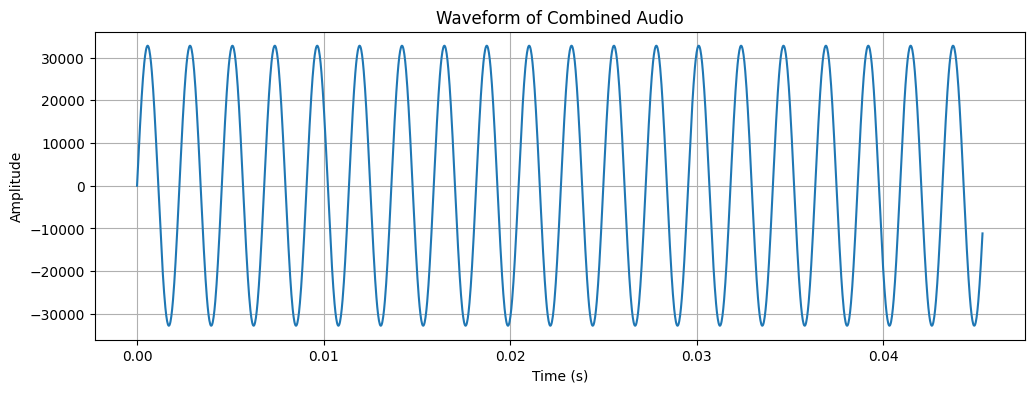

In [74]:
# Create time axis (same length as samples)
sample_rate = combined.frame_rate
time = np.linspace(0, len(samples) / sample_rate, num=len(samples))

# Plot a small portion so it’s readable (first 2000 samples)
plt.figure(figsize=(12, 4))
plt.plot(time[:2000], samples[:2000])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of Combined Audio")
plt.grid(True)
plt.show()

The lower-filter function:

In [75]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return lfilter(b, a, data)

Explain: Given a really simple waveform: x = [0, 2052, 4097, -6795, 15829], and cutoff = 1000. This waveform indicates high-frequency content

fs is the sample rate. For instance, 44100 Hz; Nyquist Frequency: nyq = 0.5 * 44100 = 22050; Normalized Cutoff: 1000 / 22050 = 0.045351473922902494

Here, we use order 5. But let’s assume the Butterworth Low-Pass Filter with order 1

The formula is: $y[k] = \alpha x[k] + (1 - \alpha)y[k - 1]$ (where $ \alpha$ is the cutoff)

Applying this formula (In the first iteration y[k - 1] is 0):

y[0] = (0.045 * 0) + (1 - 0.045) * 0 = 0

y[1] = (0.045 * 2052) + (1 - 0.045) * 0 = 92.34

y[2] = (0.045 * 4097) + (1 - 0.045) * 92.34 = 272.5

y[3] = (0.045 * -6795) + (1 - 0.045) * 272.5 = -45.53

y[4] = (0.045 * 15829) + (1 - 0.045) * -45.53 = 668.8

Final Output is y = [0, 92.34, 272.5, -45.53, 668.8]. Since now the values are much smaller, the sound would be smoother.

In the actual algorithm: The normalized cutoff would be computed by:$ (2\pi * cutoff) / nyq$ → The output y would be much higher than the presumed output

Apply the function

In [76]:
filtered_samples = butter_lowpass_filter(samples, cutoff=1000, fs=sample_rate)

Using NumPy to rebuild the audio segment

In [77]:
filtered_audio = AudioSegment(
    filtered_samples.astype(np.int16).tobytes(),
    frame_rate=sample_rate,
    sample_width=2,  # 16-bit audio
    channels=1)
# Play the audio
play(filtered_audio)

Input #0, wav, from '/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/tmpyzc3z5u5.wav':
  Duration: 00:00:06.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s


Export the file

In [78]:
filtered_audio.export("filtered_output.wav", format="wav")

<_io.BufferedRandom name='filtered_output.wav'>

Return the samples of the filtered audio

In [81]:
new_samples = np.array(filtered_audio.get_array_of_samples())
print(new_samples)

[   0    0    0 ... 1562 1760 1955]


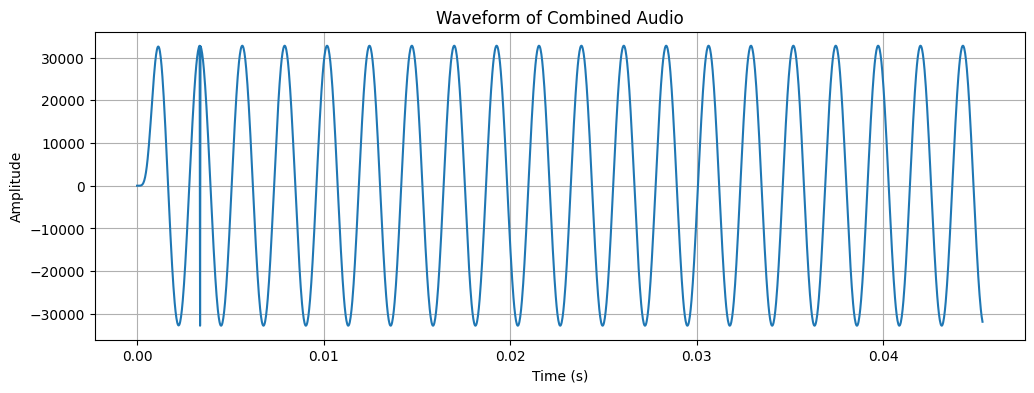

In [82]:
# Plot a small portion so it’s readable (first 2000 samples)
new_sample_rate = filtered_audio.frame_rate
time = np.linspace(0, len(new_samples) / new_sample_rate, num=len(new_samples))

plt.figure(figsize=(12, 4))
plt.plot(time[:2000], new_samples[:2000])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of Combined Audio")
plt.grid(True)
plt.show()